# Neural Networks

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tsflow
from keras_tuner import RandomSearch
import warnings
warnings.simplefilter('ignore')

In [4]:
df= pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


array([[<Axes: title={'center': 'xbox'}>,
        <Axes: title={'center': 'ybox'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'xbar'}>,
        <Axes: title={'center': 'ybar'}>,
        <Axes: title={'center': 'x2bar'}>],
       [<Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybar'}>,
        <Axes: title={'center': 'xy2bar'}>],
       [<Axes: title={'center': 'xedge'}>,
        <Axes: title={'center': 'xedgey'}>,
        <Axes: title={'center': 'yedge'}>,
        <Axes: title={'center': 'yedgex'}>]], dtype=object)

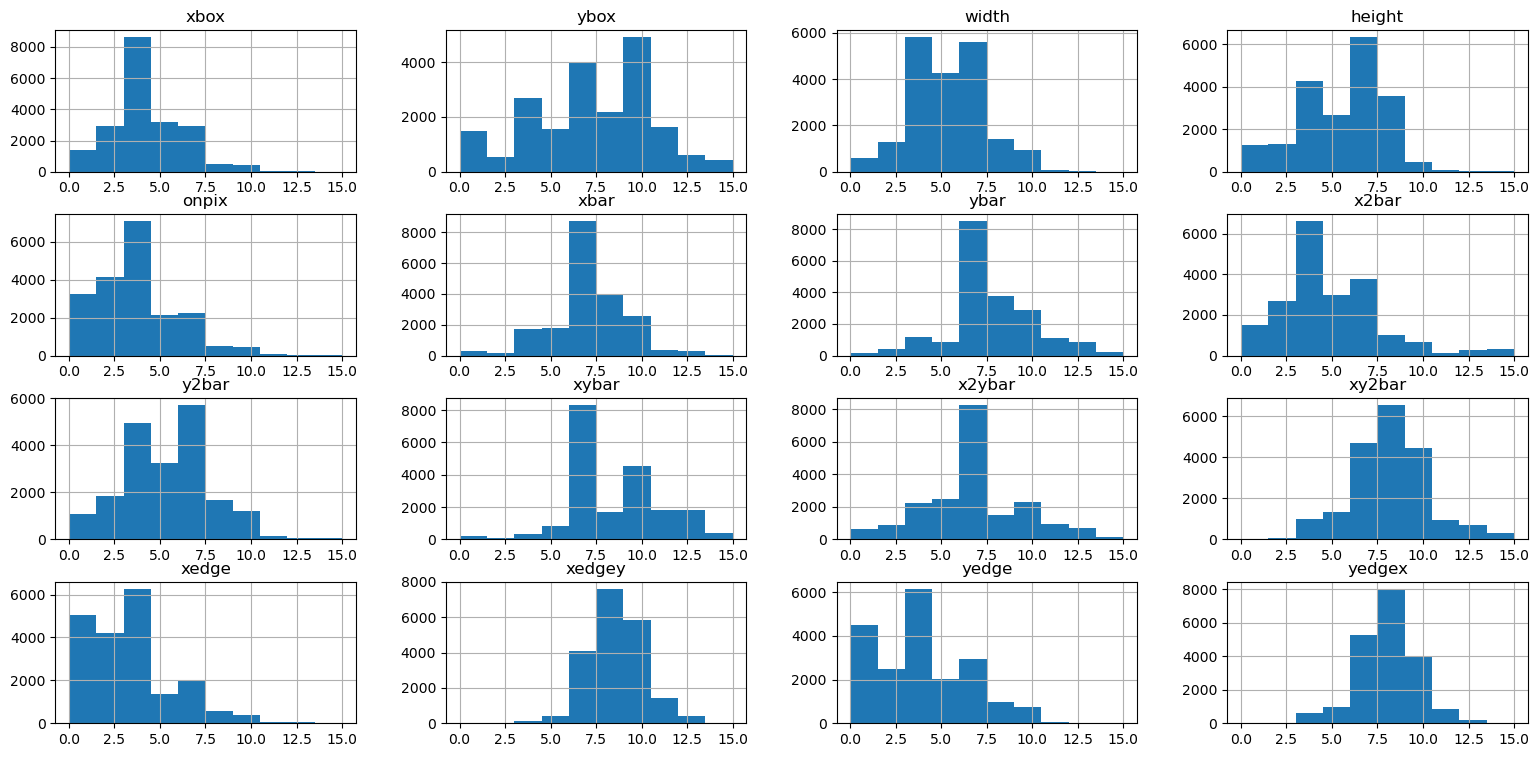

In [8]:
df.hist(figsize=(19,9))

In [9]:
label= LabelEncoder()

In [10]:
df['letter']=label.fit_transform(df['letter'])

In [11]:
feature=df.drop('letter',axis=1)
feature

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [12]:
target=df['letter']
target

0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: letter, Length: 20000, dtype: int32

In [13]:
std_scaler=StandardScaler()
std_scaler.fit_transform(feature)

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [14]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=27)


In [15]:
keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])
keras_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
keras_model.fit(x_train,y_train,validation_split=0.33,epochs=20,batch_size=20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0391 - loss: -27160.3613 - val_accuracy: 0.0424 - val_loss: -474937.9375
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0384 - loss: -1052373.6250 - val_accuracy: 0.0424 - val_loss: -3903313.7500
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0381 - loss: -5636220.5000 - val_accuracy: 0.0424 - val_loss: -12319005.0000
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0364 - loss: -15725592.0000 - val_accuracy: 0.0424 - val_loss: -26892326.0000
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0377 - loss: -32136946.0000 - val_accuracy: 0.0424 - val_loss: -48489108.0000
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0361 - loss: -55329552.0000 - val_accuracy: 0.0424 - val_loss: -77706688.0000
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0378 - loss: -86806288.0000 - val_accuracy: 0.0424 - val_loss: -114890904.0000

In [16]:
score=keras_model.evaluate(x_train,y_train)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.0379 - loss: -1527055360.0000


In [17]:
score

[-1522705920.0, 0.03971428424119949]

### Hyperparameter Tuning 

In [20]:
def build_model(hp):
    keras_model = Sequential()
    keras_model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    keras_model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    keras_model.add(Dense(1,activation='sigmoid'))
    
    keras_model.compile(optimizer=tsflow.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return keras_model

In [28]:
tuning = RandomSearch(build_model, objective='val_accuracy', max_trials=9, executions_per_trial=3, directory='my_dir', project_name='Alphabet_tuning')
tuning.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 9 Complete [00h 01m 11s]
val_accuracy: 0.04500000178813934

Best val_accuracy So Far: 0.04500000178813934
Total elapsed time: 00h 14m 01s


In [30]:
best_hyper_parameters = tuning.get_best_hyperparameters(num_trials=1)[0]
print(f"the best unit is: {best_hyper_parameters.get('units1')}, the second best unit is : {best_hyper_parameters.get('units2')}, the best learning rate is : {best_hyper_parameters.get('learning_rate')}")

the best unit is: 112, the second best unit is : 48, the best learning rate is : 0.001


In [32]:
best_model = tuning.hypermodel.build(best_hyper_parameters)

In [33]:
best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0390 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0384 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0373 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0338 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0388 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0385 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0383 - loss: 0.0000e+00 - val_accuracy: 0.0450 - val_loss: 0.0000e+00
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

### Evaluation of the model 

In [34]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.0356 - loss: 0.0000e+00
Test Accuracy: 0.03500000014901161
